In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('online_retail.csv')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Dataset contém transações de clientes de e-commerce.



In [4]:
df = df.dropna()
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]


In [5]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [7]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [8]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [9]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])


In [10]:
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)


In [11]:
def segment_client(score):
    if score >= '444':
        return 'Best Customers'
    elif score >= '344':
        return 'Loyal Customers'
    elif score >= '244':
        return 'Potential Loyalists'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_client)
rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,At Risk
12347.0,2,182,4310.00,4,4,4,444,Best Customers
12348.0,75,31,1797.24,2,2,4,224,At Risk
12349.0,19,73,1757.55,3,3,4,334,Potential Loyalists
12350.0,310,17,334.40,1,1,2,112,At Risk


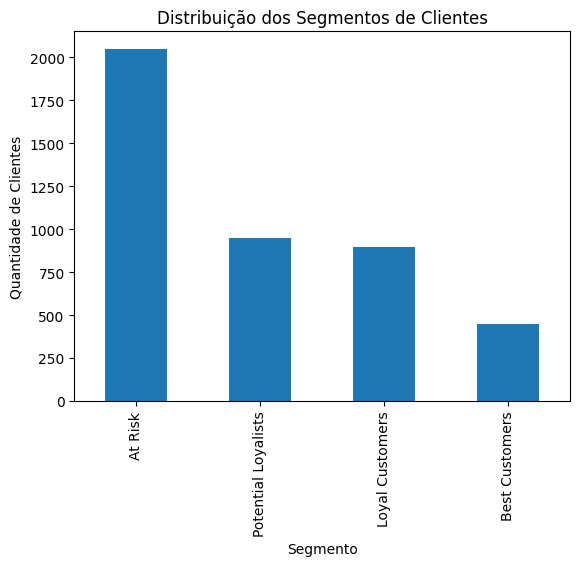

In [12]:
rfm['Segment'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Segmentos de Clientes')
plt.xlabel('Segmento')
plt.ylabel('Quantidade de Clientes')
plt.show()


💡 Principais Insights

Clientes “Best Customers” geram maior receita

Segmento “At Risk” representa oportunidade de retenção

Estratégias personalizadas podem aumentar LTV